--- Data Preview (Head) ---
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
------------------------------

Overall Accuracy: 100.00%

--- Performance Metrics Table ---
          Class  Precision  Recall  Specificity  F1 Score  NPV
    Iris-setosa        1.0     1.0          1.0       1.0  1.0
Iris-versicolor        1.0     1.0          1.0       1.0  1.0
 Iris-virginica        1.0     1.0          1.0       1.0  1.0


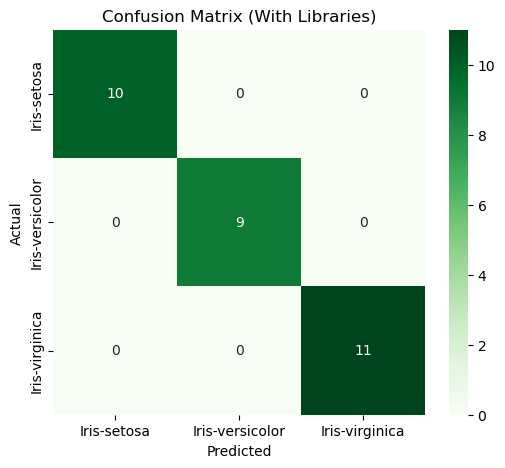

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# 1. Load and Preview Data
df = pd.read_csv('iris.csv')
print("--- Data Preview (Head) ---")
print(df.head())
print("-" * 30)

# 2. Prepare Data
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train Model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# 4. Calculate Metrics & Generate Table
cm = confusion_matrix(y_test, y_pred)
classes = np.unique(y)
metrics_list = []

for i, cls in enumerate(classes):
    # One-vs-Rest Logic
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)
    
    # Formulas
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    npv = TN / (TN + FN) if (TN + FN) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    metrics_list.append([cls, precision, recall, specificity, f1, npv])

# Create DataFrame for Table
metrics_df = pd.DataFrame(metrics_list, columns=['Class', 'Precision', 'Recall', 'Specificity', 'F1 Score', 'NPV'])

print(f"\nOverall Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
print("\n--- Performance Metrics Table ---")
print(metrics_df.round(4).to_string(index=False))

# 5. Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix (With Libraries)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()